# Replicating Predictive Modelling

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
from sklearn.model_selection import train_test_split

## Dataset
* Load dataset
* Handle missing values:
    * remove empty rows
    * fill remaining missing values with the median
* Encode Labels to numeric values (malware=1, goodware=0), using LabelEncoder
* Number of samples: 4464
* Number of features: 241
* Class distribution:
    * malware (1): 3565
    * goodware (0): 899


malware = 1, goodware = 0
Label
1    3565
0     899
Name: count, dtype: int64
Number of rows: 4464
Number of collumns: 241


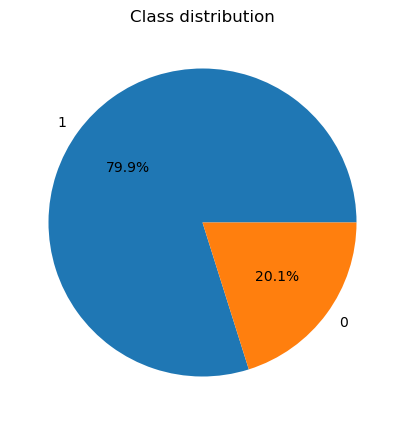

In [ ]:
file_path = "./TUANDROMD.csv"
df = pd.read_csv(file_path)

df = df.dropna()
df.isnull().sum()

df.iloc[:, :-1] = df.iloc[:, :-1].fillna(df.iloc[:, :-1].median())      #copilot helped me with this line (filling missing values with median)

label_encoder = LabelEncoder()                                                                                        
df['Label'] = label_encoder.fit_transform(df['Label'])                  # malware = 1, goodware = 0

class_counts = Counter(df['Label'])                                        
print("malware = 1, goodware = 0")

Class = df['Label']
print(Class.value_counts())

X, y = df.drop(columns=['Label']), df['Label']

print("Number of rows:", len(X))
print("Number of collumns:", len(X.columns))

plt.figure(figsize=(10, 5))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%')
plt.title("Class distribution")
plt.show()



## Spliting and Normalizing the dataset
* Split the dataset into training (80%) and testing (20%) sets using train_test_split()
* Scale the features using StandardScaler()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Classifiers

In [ ]:
classifiers = {                                                     #chatgpt helped me with the necessary parameters for each classifier                                              
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)
results = {}

for name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X_train, y_train, cv=kfold, scoring='accuracy')
    results[name] = scores.mean()
    print(f"{name}: {scores.mean():.4f}")

Random Forest: 0.9938
Extra Trees: 0.9941
AdaBoost: 0.9807
XGBoost: 0.9910
Gradient Boosting: 0.9846


## Graphic

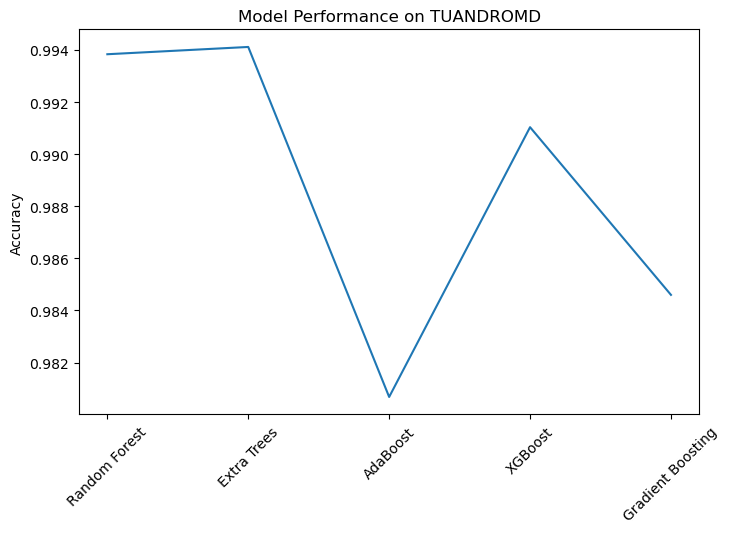

In [41]:
plt.figure(figsize=(8,5))
sns.lineplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Model Performance on TUANDROMD')
plt.show()